In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv")
test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_AbJTz2l.csv")
sample = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_8RXa3c6.csv")

## Preprocessing

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [5]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [6]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [7]:
5681/8523

0.6665493370878799

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
train.Item_Identifier[:10]

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [13]:
train['source'] = 'train'
test['source'] = 'test'

In [14]:
train[:5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [15]:
df = pd.concat([train, test])
df[:3]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train


In [16]:
df.shape

(14204, 13)

In [17]:
df['Item_Identifier'].nunique()

1559

In [18]:
df.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [19]:
df['Item_Identifier_2'] = df['Item_Identifier'].apply(lambda x : x[0:2])
df['Item_Identifier_3'] = df['Item_Identifier'].apply(lambda x : x[0:3])

In [20]:
df['Item_Identifier_2'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [21]:
df['Item_Identifier_3'].value_counts()[:5]

FDT    467
FDX    460
FDW    460
FDV    454
FDU    452
Name: Item_Identifier_3, dtype: int64

In [22]:
del df['Item_Identifier_3']

In [23]:
df.shape

(14204, 14)

In [24]:
df['Item_Weight'].isna().sum()

2439

In [25]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_2
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,NC


In [26]:
df.groupby(["Item_Identifier_2"])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [27]:
# df.groupby('Item_Identifier_2').Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [28]:
df['Item_Weight'] = df.groupby('Item_Identifier_2').Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [29]:
df['Item_Weight'].isna().sum()

0

In [30]:
df['Item_Fat_Content'].nunique()

5

In [31]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [32]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [33]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"})

In [34]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

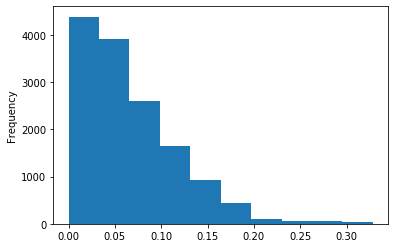

In [35]:
df['Item_Visibility'].plot(kind = 'hist')

In [36]:
df['Item_Visibility'].value_counts(ascending = False)

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

In [37]:
df.sort_values(by = ['Item_Identifier', 'Item_Visibility'])

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_2
1197,Low Fat,DRA12,141.6154,3829.0158,Soft Drinks,0.000000,11.600000,2002,OUT045,Tier 2,NaN,Supermarket Type1,train,DR
1693,Low Fat,DRA12,141.9154,992.7078,Soft Drinks,0.000000,11.600000,2004,OUT035,Tier 2,Small,Supermarket Type1,train,DR
3912,Low Fat,DRA12,140.0154,NaN,Soft Drinks,0.040748,12.116645,1985,OUT027,Tier 3,Medium,Supermarket Type3,test,DR
1245,Low Fat,DRA12,142.3154,2552.6772,Soft Drinks,0.040912,11.600000,1987,OUT013,Tier 3,High,Supermarket Type1,train,DR
500,Low Fat,DRA12,142.9154,NaN,Soft Drinks,0.040946,11.600000,1997,OUT046,Tier 1,Small,Supermarket Type1,test,DR
5081,Low Fat,DRA12,141.0154,NaN,Soft Drinks,0.041010,11.600000,1999,OUT049,Tier 1,Medium,Supermarket Type1,test,DR
7467,Low Fat,DRA12,142.0154,850.8924,Soft Drinks,0.041113,11.600000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,DR
118,Low Fat,DRA12,140.3154,2552.6772,Soft Drinks,0.041178,11.600000,2007,OUT017,Tier 2,NaN,Supermarket Type1,train,DR
8043,Low Fat,DRA12,143.0154,283.6308,Soft Drinks,0.068535,11.600000,1998,OUT010,Tier 3,NaN,Grocery Store,train,DR
4416,Regular,DRA24,165.7868,4913.6040,Soft Drinks,0.039735,12.116645,1985,OUT027,Tier 3,Medium,Supermarket Type3,train,DR


In [38]:
df.loc[df['Item_Visibility'] == 0.000000, 'Item_Visibility'] = np.NAN

In [39]:
df['Item_Visibility'].isna().sum()

879

In [40]:
df['Item_Visibility'] = df.groupby('Item_Identifier_2').Item_Visibility.transform(lambda x: x.fillna(x.mean()))

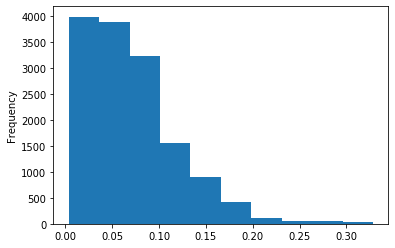

In [41]:
df['Item_Visibility'].plot(kind = 'hist')

In [42]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_2
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.072558,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.062099,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,NC


In [43]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [44]:
df['Outlet_Identifier'].isna().sum()

0

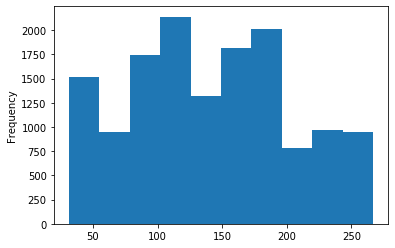

In [45]:
df['Item_MRP'].plot(kind = 'hist')

In [46]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [47]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [48]:
df['Outlet_Establishment_Year'].nunique()

9

In [49]:
df.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               1559
                           OUT019                880
1987                       OUT013               1553
1997                       OUT046               1550
1998                       OUT010                925
1999                       OUT049               1550
2002                       OUT045               1548
2004                       OUT035               1550
2007                       OUT017               1543
2009                       OUT018               1546
Name: Outlet_Identifier, dtype: int64

In [50]:
datetime.now().year, datetime.now().month

(2021, 3)

In [51]:
df['Outlet_Age'] = datetime.now().year - df['Outlet_Establishment_Year']

In [52]:
df['Outlet_Age'].value_counts()

36    2439
34    1553
22    1550
17    1550
24    1550
19    1548
12    1546
14    1543
23     925
Name: Outlet_Age, dtype: int64

In [53]:
del df['Outlet_Establishment_Year']

In [54]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [55]:
df['Outlet_Size'].isna().sum()

4016

In [56]:
df.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           1553
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [57]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [58]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          2430
                      Medium         1550
Tier 2                Small          1550
Tier 3                Medium         3105
                      High           1553
Name: Outlet_Size, dtype: int64

In [59]:
df.groupby(['Outlet_Location_Type', 'Outlet_Type']).Outlet_Size.value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [60]:
df.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']).Item_Weight.value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size  Item_Weight
Tier 1                Grocery Store      Small        12.735577       637
                                                      13.344139       168
                                                      12.116645        75
                      Supermarket Type1  Medium       17.600000        18
                                                      12.150000        17
                                                      10.500000        16
                                                      11.800000        15
                                                      13.650000        15
                                                      15.100000        15
                                                      15.700000        14
                                                      19.350000        14
                                                      9.800000         13
                                              

In [61]:
df.groupby(['Outlet_Type']).Outlet_Size.value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [62]:
df[:3]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_2,Outlet_Age
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,FD,22
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,DR,12
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,train,FD,22


In [63]:
df['Outlet_Size'].mode()[0]

'Medium'

In [64]:
# df.groupby('Outlet_Location_Type').Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))

In [65]:
df['Outlet_Size'] = df.groupby('Outlet_Location_Type').Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))

In [66]:
df['Outlet_Size'].isna().sum()

0

In [67]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [68]:
df['Outlet_Type'].apply(lambda x: x.split()[0])[:5]

0    Supermarket
1    Supermarket
2    Supermarket
3        Grocery
4    Supermarket
Name: Outlet_Type, dtype: object

In [69]:
df['Outlet_Type_Category'] =  df['Outlet_Type'].apply(lambda x: x.split()[0])

In [70]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_2,Outlet_Age,Outlet_Type_Category
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,FD,22,Supermarket
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,DR,12,Supermarket
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,train,FD,22,Supermarket
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.072558,19.20,OUT010,Tier 3,Medium,Grocery Store,train,FD,23,Grocery
4,Low Fat,NCD19,53.8614,994.7052,Household,0.062099,8.93,OUT013,Tier 3,High,Supermarket Type1,train,NC,34,Supermarket


In [71]:
df['Outlet_Type_Category'].value_counts()

Supermarket    12399
Grocery         1805
Name: Outlet_Type_Category, dtype: int64

In [72]:
df.corr()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Age
Item_MRP,1.000000,0.567574,-0.008853,0.033206,-0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.133754,0.011182,0.049135
Item_Visibility,-0.008853,-0.133754,1.000000,-0.016502,0.088624
Item_Weight,0.033206,0.011182,-0.016502,1.000000,-0.000312
Outlet_Age,-0.000141,0.049135,0.088624,-0.000312,1.000000


In [73]:
X = df.select_dtypes(include=np.number).drop(columns=['Item_Outlet_Sales'])

In [74]:
X[:4]

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Age
0,249.8092,0.016047,9.30,22
1,48.2692,0.019278,5.92,12
2,141.6180,0.016760,17.50,22
3,182.0950,0.072558,19.20,23


In [75]:
X.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Age'], dtype='object')

In [76]:
vif_data = pd.DataFrame()


In [77]:
vif_data

""


In [78]:
vif_data['Feature'] = X.columns

In [79]:
vif_data

,Feature
0,Item_MRP
1,Item_Visibility
2,Item_Weight
3,Outlet_Age


In [80]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [81]:
list(range(len(X.columns)))

[0, 1, 2, 3]

In [82]:
vif_data

,Feature,VIF
0,Item_MRP,4.947795
1,Item_Visibility,2.908423
2,Item_Weight,6.436093
3,Outlet_Age,6.197776


In [83]:
df_number_columns = df.select_dtypes(include=np.number).columns

In [84]:
df_number_columns

Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Age'],
      dtype='object')

In [85]:
df_category_columns = df.select_dtypes(exclude=np.number).columns

In [86]:
df_category_columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source',
       'Item_Identifier_2', 'Outlet_Type_Category'],
      dtype='object')

In [87]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Identifier_2,Outlet_Age,Outlet_Type_Category
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,FD,22,Supermarket
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,DR,12,Supermarket
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,train,FD,22,Supermarket
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.072558,19.20,OUT010,Tier 3,Medium,Grocery Store,train,FD,23,Grocery
4,Low Fat,NCD19,53.8614,994.7052,Household,0.062099,8.93,OUT013,Tier 3,High,Supermarket Type1,train,NC,34,Supermarket


In [88]:
data_to_encode = df[df_category_columns].drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'source'] )

In [89]:
data_to_encode[:3]

,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_2,Outlet_Type_Category
0,Low Fat,Dairy,Tier 1,Medium,Supermarket Type1,FD,Supermarket
1,Regular,Soft Drinks,Tier 3,Medium,Supermarket Type2,DR,Supermarket
2,Low Fat,Meat,Tier 1,Medium,Supermarket Type1,FD,Supermarket


In [90]:
df_category_encoded =  pd.get_dummies(data_to_encode)

In [91]:
df_category_encoded[:2]

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_2_DR,Item_Identifier_2_FD,Item_Identifier_2_NC,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [92]:
df_final = pd.concat([df_category_encoded, df[df_number_columns], 
                      df[['Item_Identifier', 'Outlet_Identifier', 'source']]], axis = 1)

In [93]:
df_final.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Age,Item_Identifier,Outlet_Identifier,source
0,1,0,0,0,0,0,1,0,0,0,...,0,1,249.8092,3735.1380,0.016047,9.30,22,FDA15,OUT049,train
1,0,1,0,0,0,0,0,0,0,0,...,0,1,48.2692,443.4228,0.019278,5.92,12,DRC01,OUT018,train
2,1,0,0,0,0,0,0,0,0,0,...,0,1,141.6180,2097.2700,0.016760,17.50,22,FDN15,OUT049,train
3,0,1,0,0,0,0,0,0,1,0,...,1,0,182.0950,732.3800,0.072558,19.20,23,FDX07,OUT010,train
4,1,0,0,0,0,0,0,0,0,0,...,0,1,53.8614,994.7052,0.062099,8.93,34,NCD19,OUT013,train


In [94]:
train_preprocessed = df_final[df_final['source'] == 'train']
test_preprocessed = df_final[df_final['source'] == 'test']

In [95]:
train_preprocessed.shape, test_preprocessed.shape

((8523, 41), (5681, 41))

In [96]:
del train_preprocessed['source']
train_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_2_NC,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,249.8092,3735.1380,0.016047,9.30,22,FDA15,OUT049
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,48.2692,443.4228,0.019278,5.92,12,DRC01,OUT018
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,141.6180,2097.2700,0.016760,17.50,22,FDN15,OUT049
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,182.0950,732.3800,0.072558,19.20,23,FDX07,OUT010
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,53.8614,994.7052,0.062099,8.93,34,NCD19,OUT013


In [97]:
del test_preprocessed['source']
test_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_2_NC,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,107.8622,NaN,0.007565,20.750000,22,FDW58,OUT049
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,87.3198,NaN,0.038428,8.300000,14,FDW14,OUT017
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,241.7538,NaN,0.099575,14.600000,23,NCN55,OUT010
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,155.0340,NaN,0.015388,7.315000,14,FDQ58,OUT017
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,234.2300,NaN,0.118599,12.735577,36,FDY38,OUT027


In [98]:
train_X = train_preprocessed.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [99]:
test_X = test_preprocessed.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [100]:
train_y = train_preprocessed['Item_Outlet_Sales']

In [101]:
train_y[:5]

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [102]:
sample = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_8RXa3c6.csv")

In [103]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


## Modeling

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [105]:
lm = LinearRegression()
lm.fit(train_X, train_y)
pred_train = lm.predict(train_X)
pred_test = lm.predict(test_X)
pred_test = abs(pred_test)
print('MAE: ', mean_absolute_error(train_y, pred_train))
print('RMSE: ', np.sqrt(mean_squared_error(train_y, pred_train)))
print('R-squared: ', r2_score(train_y, pred_train))

MAE:  835.9428028725182
RMSE:  1127.7422182890919
R-squared:  0.5632245226668964


In [106]:
sample['Item_Outlet_Sales'] = pred_test

In [110]:
# sample.to_csv('BigMart_LinearRegressionOutput.csv')

## Regularization

In [111]:
from sklearn.model_selection import cross_val_score

In [125]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [121]:
def run_model(model, train_X, train_y, test_X, sample, filename):
    model.fit(train_X, train_y)
    pd.Series(model.coef_, index =test_X.columns).plot(kind = 'bar')
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print('MAE: ', mean_absolute_error(train_y, pred_train))
    cv_score = cross_val_score(model, train_X, train_y, cv = 10, scoring = 'neg_mean_absolute_error')
    print('CV score: ', np.mean(np.abs(cv_score)))
    print('R-squared: ', r2_score(train_y, pred_train))
    sample['Item_Outlet_Sales'] = pred_test
#     sample.to_csv(filename, index = False)
    sample.head()

MAE:  835.9428028725182
CV score:  839.7594122998368
R-squared:  0.5632245226668964


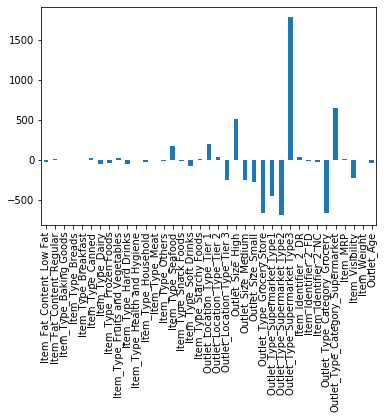

In [122]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

In [135]:
# model = Lasso(alpha = 0) #Just as Linear Regression
# run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

MAE:  840.1643704299814
CV score:  840.7615821939432
R-squared:  0.5534691409208817


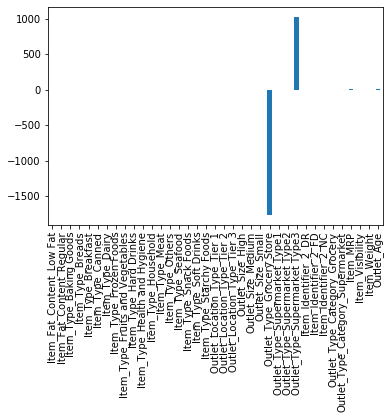

In [129]:
model = Lasso(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

In [139]:
# model = Lasso(alpha = .005)
# run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

MAE:  836.05874362892
CV score:  839.4994606977983
R-squared:  0.5623286269423307


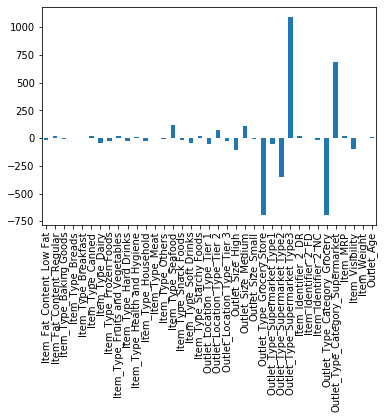

In [130]:
model = Ridge(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

MAE:  909.254053000834
CV score:  910.2530708759972
R-squared:  0.4693808243180325


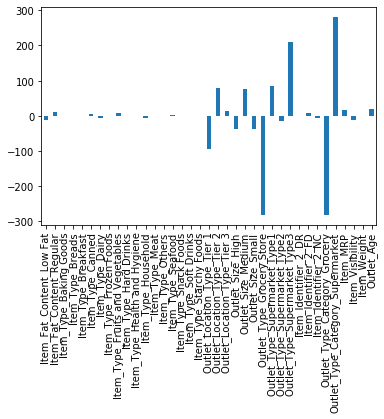

In [133]:
model = ElasticNet(alpha = 1, l1_ratio=0.5)
run_model(model, train_X, train_y, test_X, sample, 'test_result_LR.csv')

In [131]:
ElasticNet?